<a href="https://colab.research.google.com/github/VishalGaba/HousingPricePrediction/blob/main/Boston_housing_data_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df=pd.read_csv('/content/HousingData.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
df.dropna(inplace=True)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,394.0,3.690136,9.202423,0.00632,0.081955,0.26888,3.435973,88.9762
ZN,394.0,11.460660,23.954082,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,394.0,11.000863,6.908364,0.46000,5.130000,8.56000,18.100000,27.7400
CHAS,394.0,0.068528,0.252971,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,394.0,0.553215,0.113112,0.38900,0.453000,0.53800,0.624000,0.8710
RM,394.0,6.280015,0.697985,3.56100,5.879250,6.20150,6.605500,8.7800
AGE,394.0,68.932741,27.888705,2.90000,45.475000,77.70000,94.250000,100.0000
DIS,394.0,3.805268,2.098571,1.12960,2.110100,3.19920,5.116700,12.1265
RAD,394.0,9.403553,8.633451,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,394.0,406.431472,168.312419,187.00000,280.250000,330.00000,666.000000,711.0000


In [12]:
df.rename(columns={'MEDV':"PRICE"}, inplace=True)

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [14]:
# Exploratory Data Analysis
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.188075,0.391552,-0.051970,0.416160,-0.227170,0.341311,-0.365052,0.608667,0.560841,0.265428,-0.386254,0.461906,-0.397230
ZN,-0.188075,1.000000,-0.521256,-0.033357,-0.515660,0.343210,-0.568174,0.645359,-0.298773,-0.305768,-0.422164,0.169894,-0.415041,0.406822
INDUS,0.391552,-0.521256,1.000000,0.049820,0.762737,-0.403068,0.642387,-0.696569,0.591944,0.734204,0.395691,-0.344788,0.598156,-0.510829
CHAS,-0.051970,-0.033357,0.049820,1.000000,0.076661,0.095308,0.072644,-0.095037,0.014102,-0.026513,-0.104995,0.068913,-0.037113,0.173701
NOX,0.416160,-0.515660,0.762737,0.076661,1.000000,-0.316563,0.732540,-0.768137,0.628170,0.679824,0.210216,-0.384257,0.593655,-0.459054
RM,-0.227170,0.343210,-0.403068,0.095308,-0.316563,1.000000,-0.248670,0.218713,-0.236057,-0.320561,-0.390686,0.123320,-0.636226,0.723951
AGE,0.341311,-0.568174,0.642387,0.072644,0.732540,-0.248670,1.000000,-0.753547,0.443585,0.504472,0.264968,-0.281990,0.601137,-0.407470
DIS,-0.365052,0.645359,-0.696569,-0.095037,-0.768137,0.218713,-0.753547,1.000000,-0.477075,-0.529603,-0.228840,0.285168,-0.505036,0.279547
RAD,0.608667,-0.298773,0.591944,0.014102,0.628170,-0.236057,0.443585,-0.477075,1.000000,0.900000,0.441949,-0.444135,0.510868,-0.416638
TAX,0.560841,-0.305768,0.734204,-0.026513,0.679824,-0.320561,0.504472,-0.529603,0.900000,1.000000,0.446961,-0.435457,0.572218,-0.508864


<Axes: >

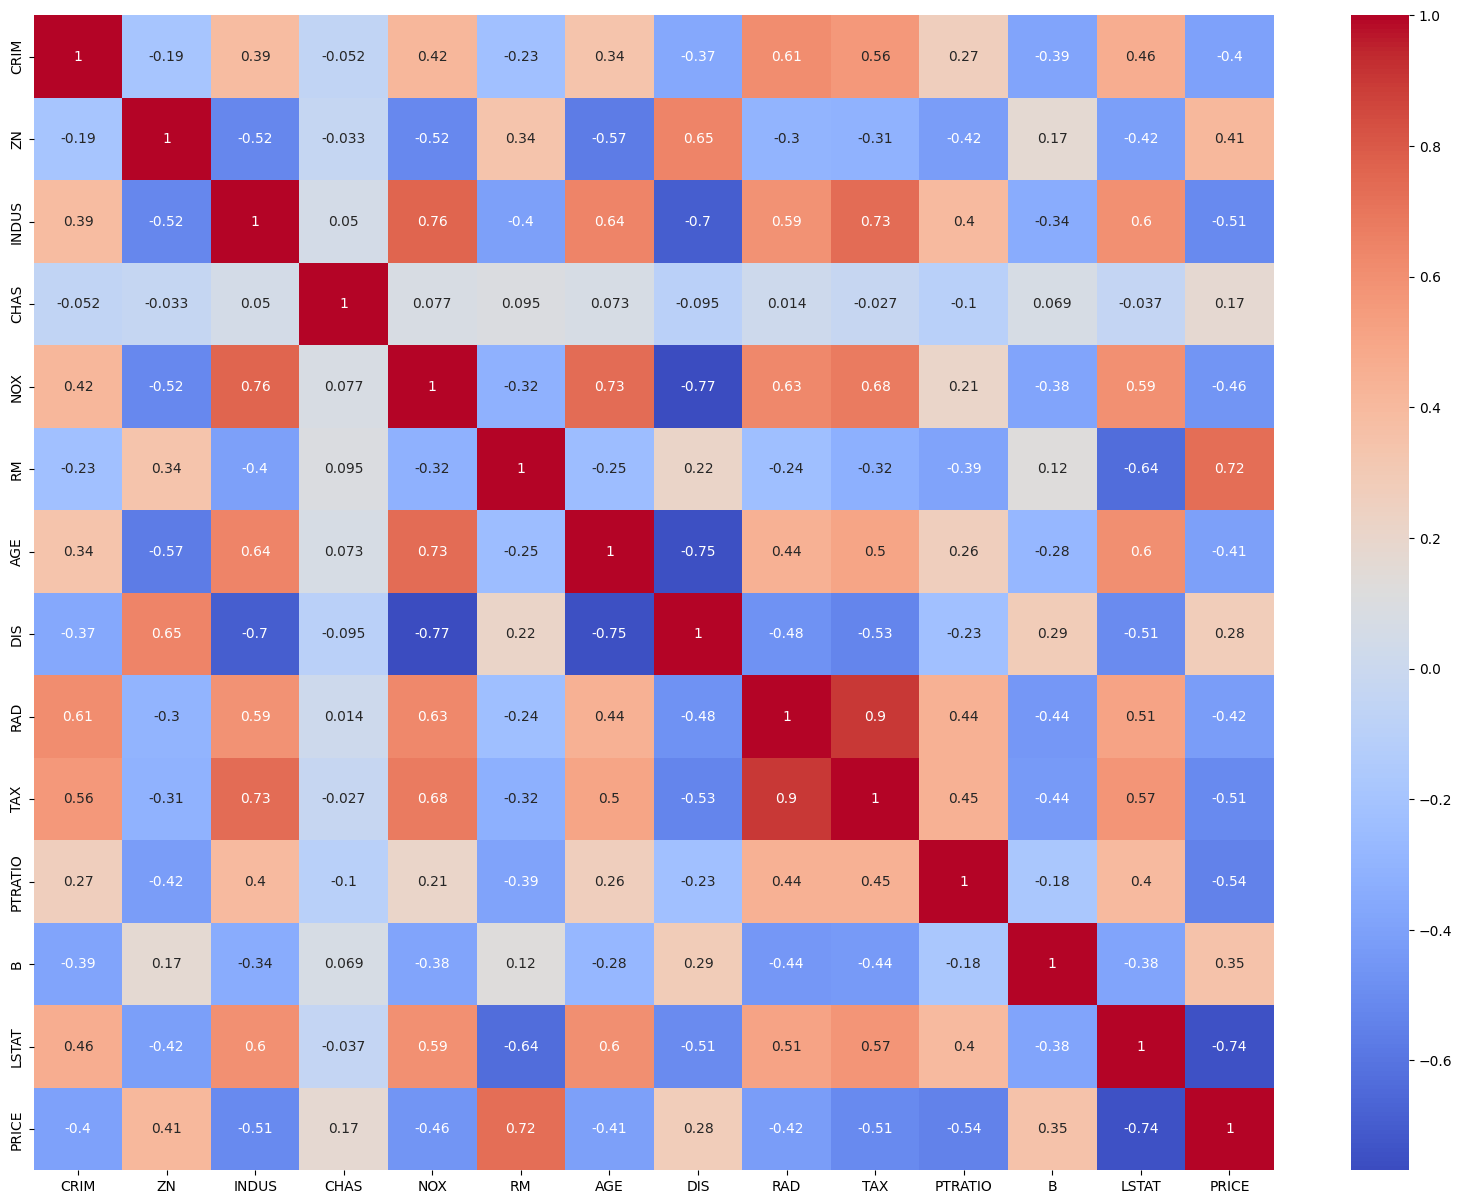

In [20]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [21]:
df.shape

(394, 14)

In [27]:
import warnings
warnings.filterwarnings('ignore')

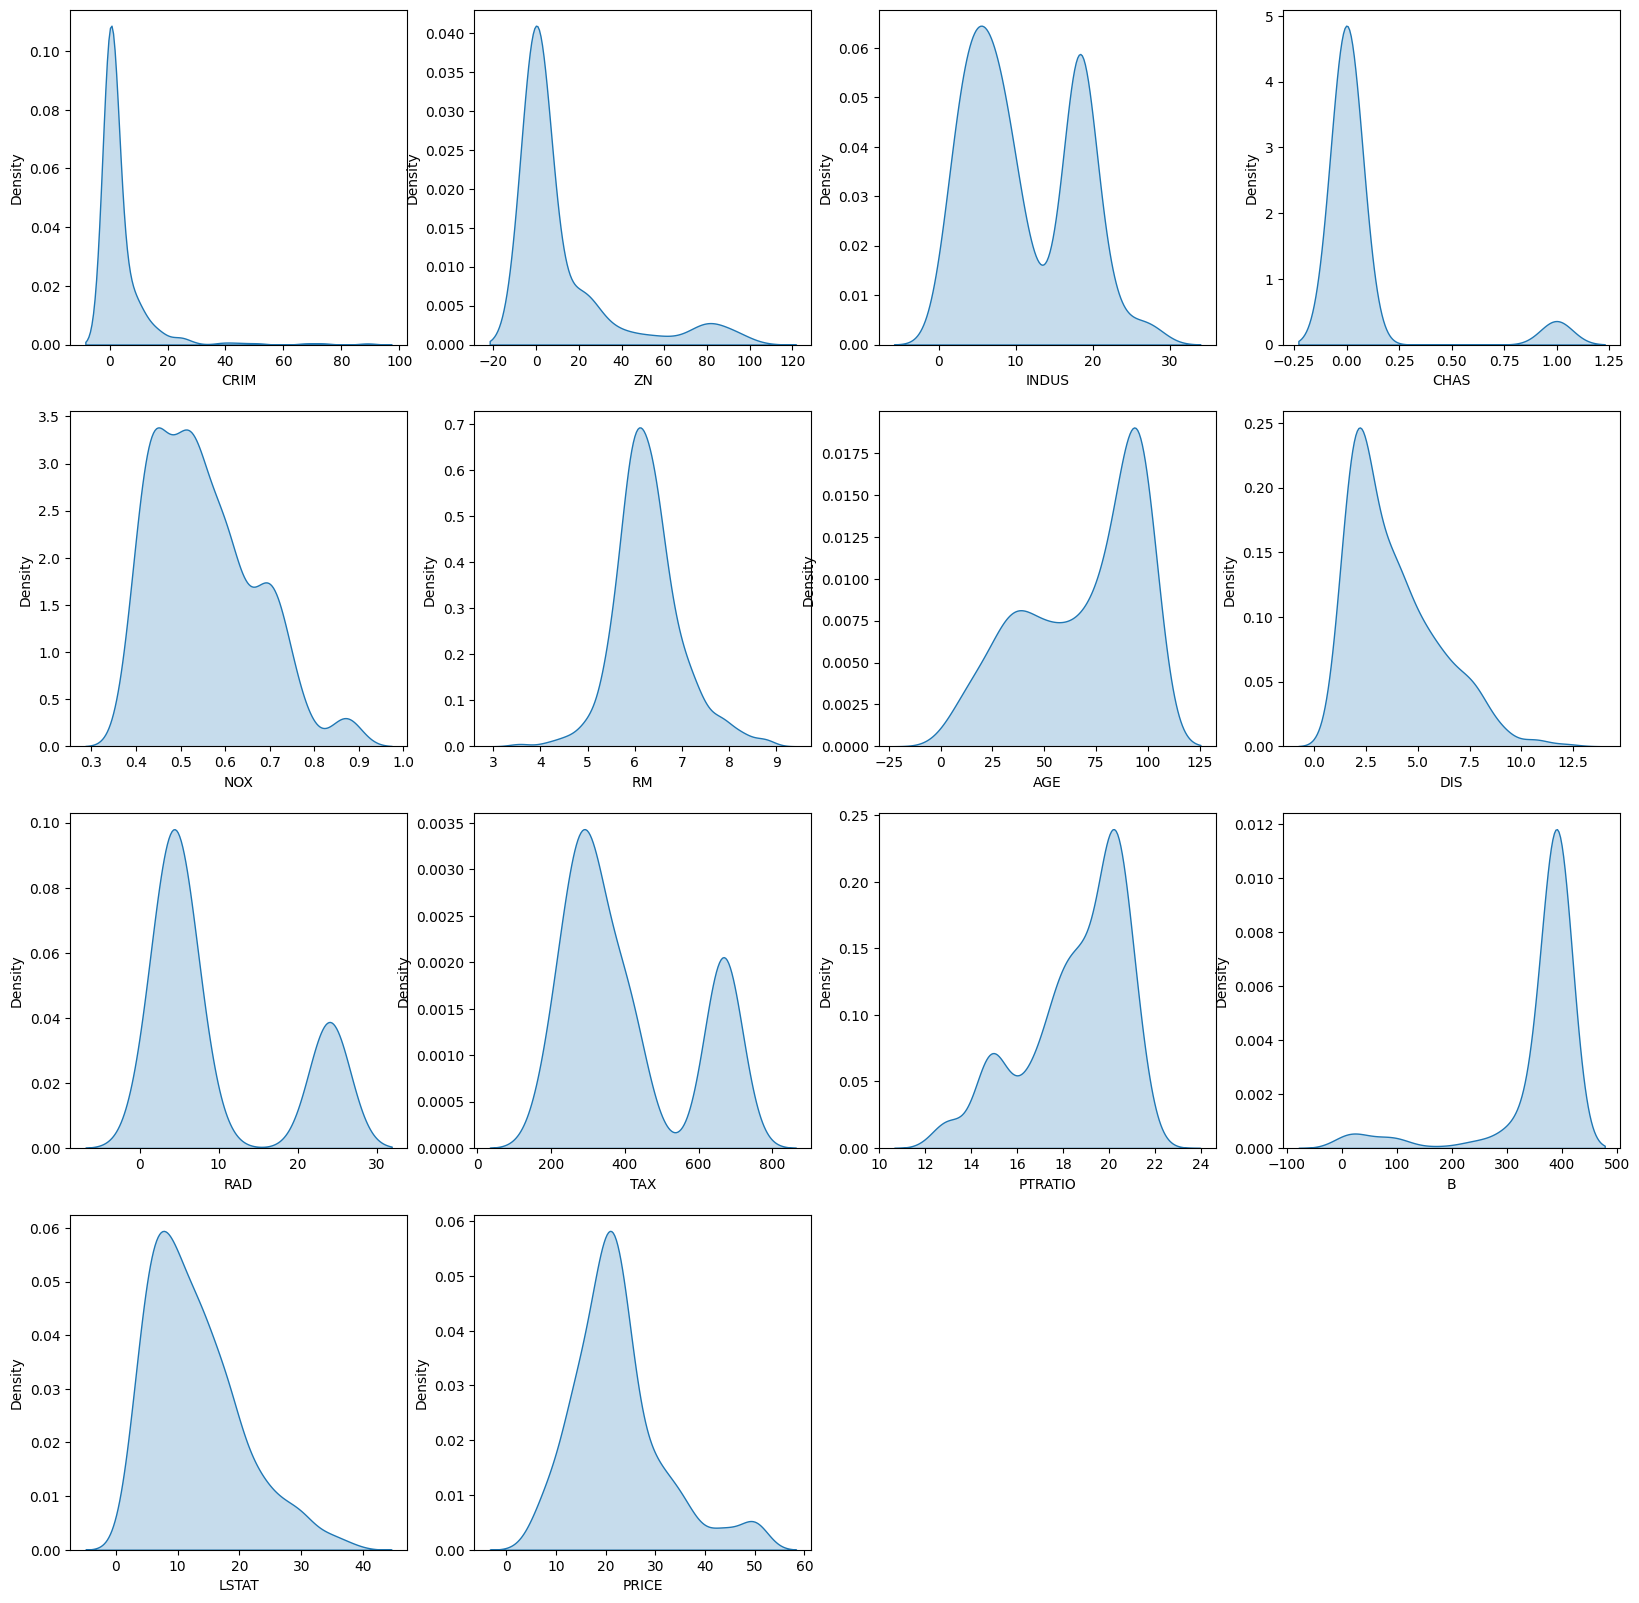

In [28]:
# checking for distribution in the data

plt.figure(figsize=(20,20))

plot=1

for column in df.columns:
  plt.subplot(4,4,plot)
  sns.kdeplot(df, x=column, shade=True)
  plot+=1
plt.show()

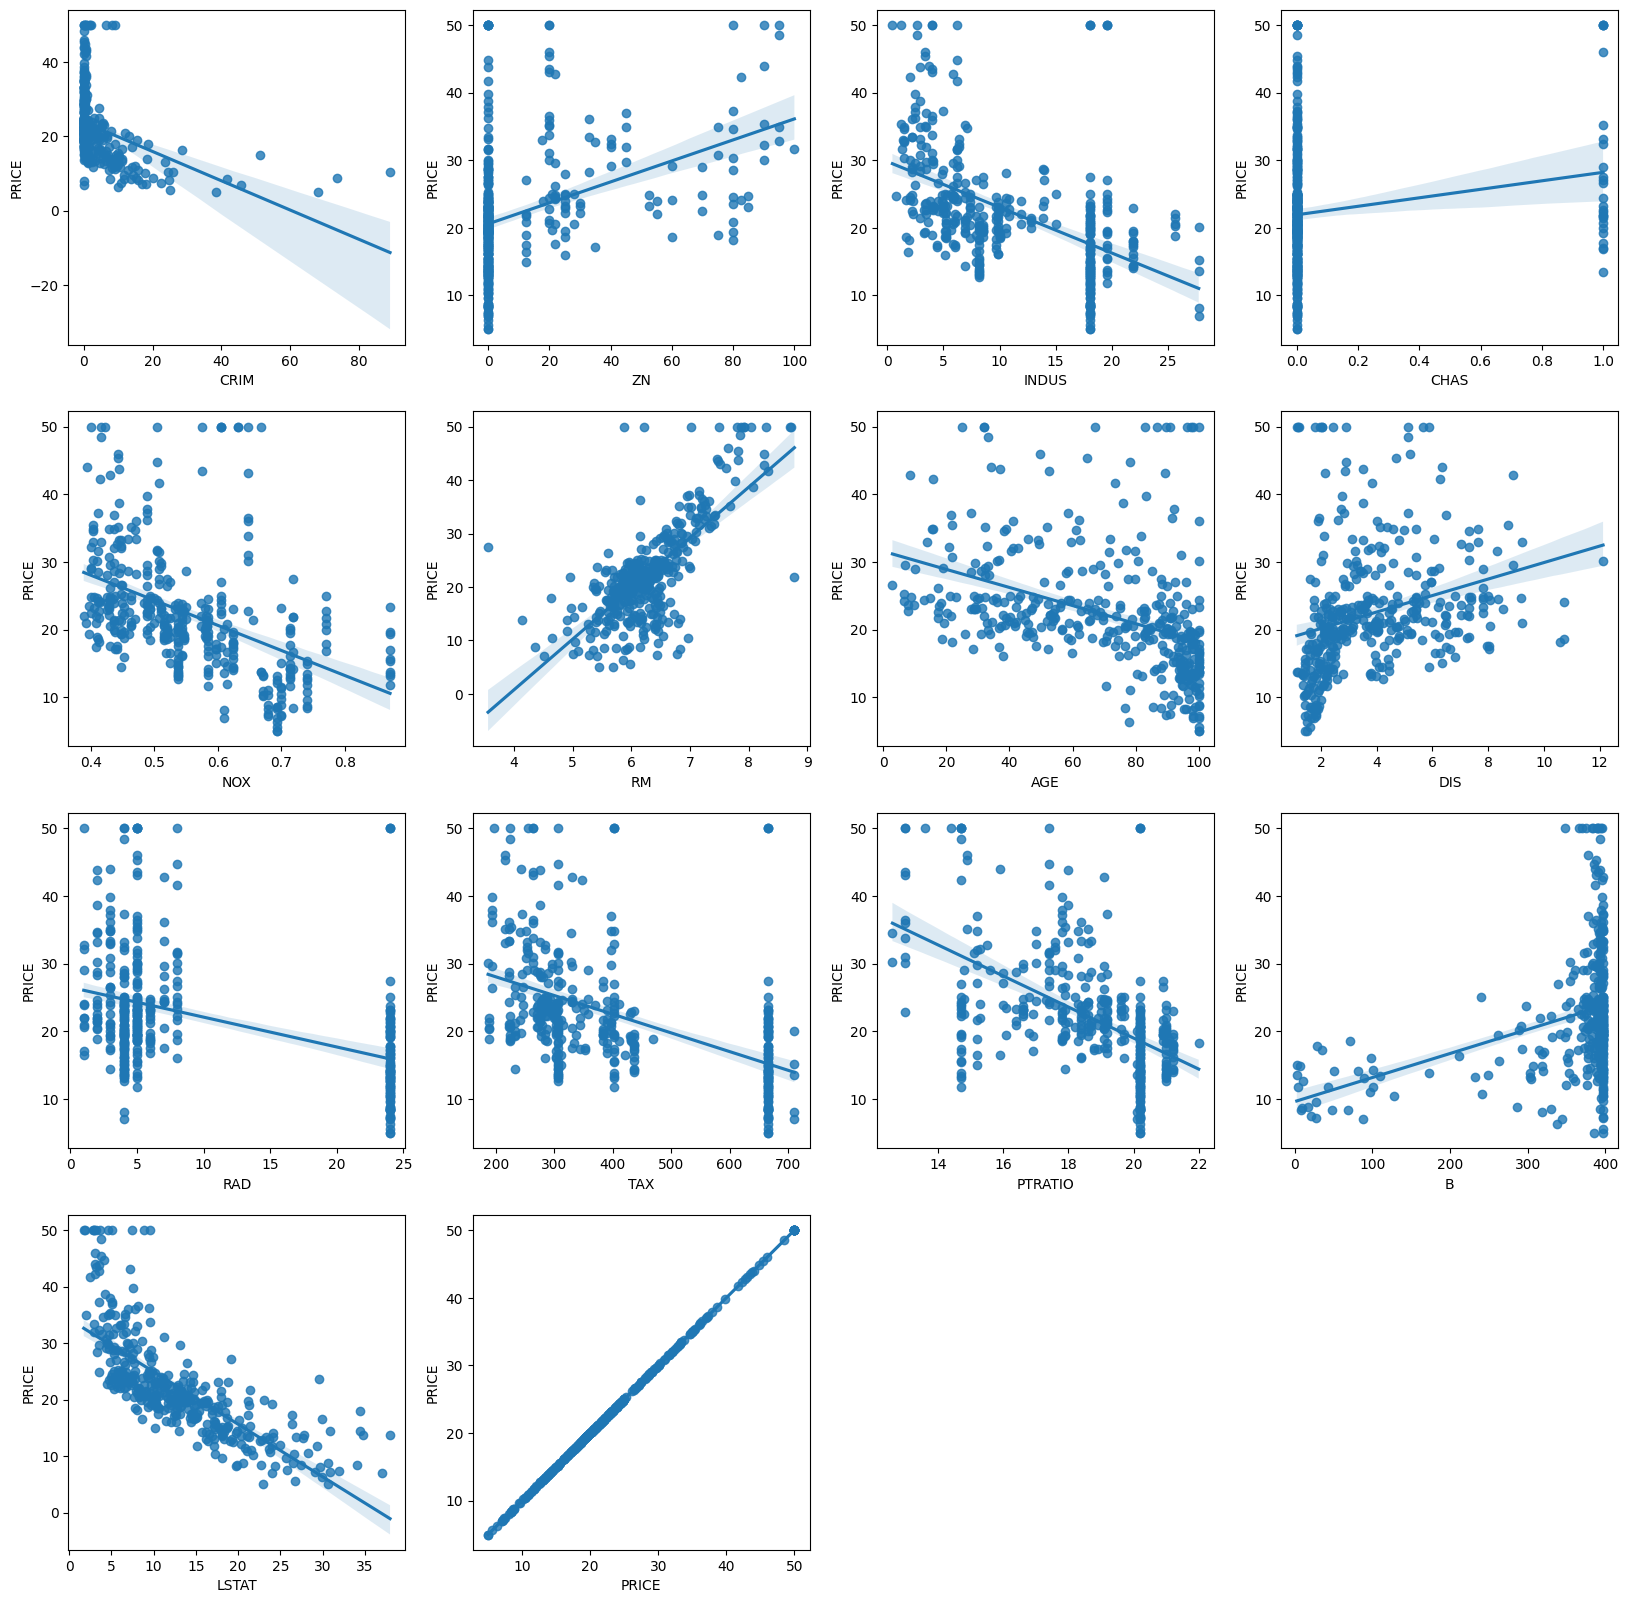

In [31]:
plt.figure(figsize=(20,20))
plot=1

for column in df.columns:
  plt.subplot(4,4,plot)
  sns.regplot(df, x=column, y='PRICE')
  plot+=1
plt.show()

In [32]:
# Independent and Dependent Features

X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [50]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [51]:
# Since Our data in normally distributed scaling the the data

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [52]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [53]:
# Model Traning
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [54]:
lr.fit(X_train, y_train)

LinearRegression()

In [55]:
print(lr.coef_)

[-0.61001932  0.99627291  0.44981194  0.73307289 -2.22081418  3.77923287
 -0.68072203 -3.09132436  2.05395521 -2.3070376  -1.97172779  0.94398455
 -2.40047343]


In [56]:
print(lr.intercept_)

22.536825396825392


In [57]:
# Checking the parameter on which model is trained
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [58]:
y_pred=lr.predict(X_test)

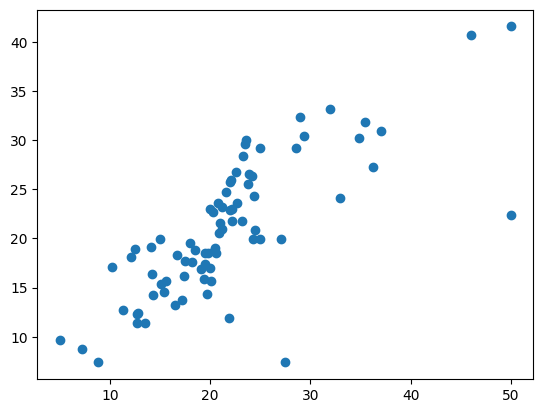

In [60]:
plt.scatter(y_test, y_pred)

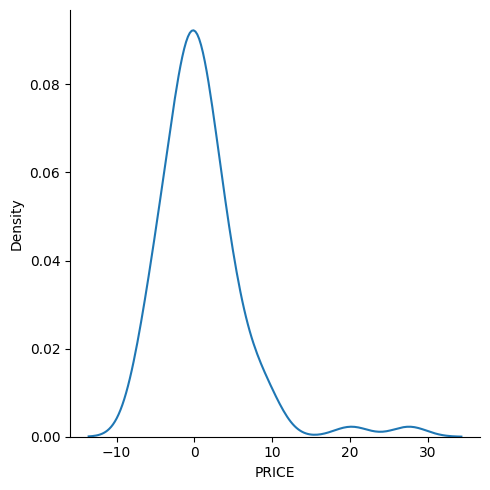

In [64]:
residual=y_test-y_pred
sns.displot(residual, kind='kde')

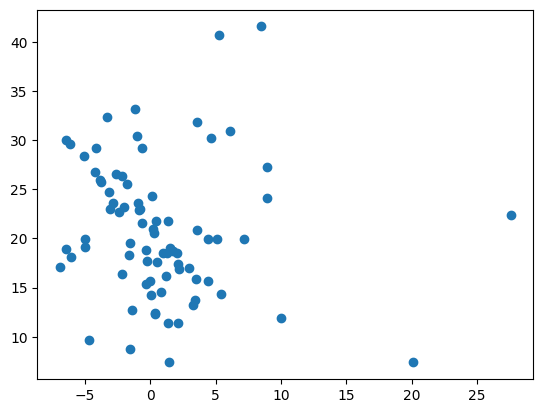

In [65]:
# Scatter plot between prediction vs residuals

plt.scatter(residual, y_pred)

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
print("Mean Squared Error: ", mean_squared_error(y_pred, y_test))
print("Mean Absolute Error: ", mean_absolute_error(y_pred, y_test))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_pred, y_test)))


Mean Squared Error:  28.84987277716699
Mean Absolute Error:  3.4843562556302436
Root Mean Squared Error:  5.371207757773571


In [83]:
from sklearn.metrics import r2_score

In [86]:
score=r2_score(y_test, y_pred)
print(score)

0.5806563123015815


In [87]:
adjusted_R2_score=1-(1-score)*len(y_test)/(len(y_test)-X_test.shape[1]-1)

In [88]:
print(adjusted_R2_score)

0.49033613341269144


In [92]:
import pickle
pickle.dump(lr, open('regmodel.pkl', 'wb'))

In [93]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [94]:
pickled_model

LinearRegression()